In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import imghdr
import splitfolders
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from PIL import ImageFile
from PIL import Image
import random
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
DATADIR = "C:\\Users\\lyosh\\OneDrive\\Desktop\\archive\\train"

DATATEST = "C:\\Users\\lyosh\\OneDrive\\Desktop\\archive\\test"

DATAALL = "C:\\Users\\lyosh\\OneDrive\\Desktop\\archive\\allImages"
CATEGORIES = ["happy", "sad"]



In [5]:
#pie graph for the input images

count = 0
happyCount = 0
sadCount = 0

for category in os.listdir(DATAALL):
     for image in os.listdir(os.path.join(DATADIR, category)):
        if category == 'happy':
            happyCount += 1
        else:
            sadCount += 1
        count += 1
#         imgPath = os.path.join(DATADIR, imgClass, image)
#         try:
#             img = cv2.imread(imgPath)
#             tip = imghdr.what(imgPath)
#             if tip not in 
print("Total count: ", count)
print("Total happy count: ", happyCount)
print("Total sad count: ", sadCount)

Total count:  12045
Total happy count:  7215
Total sad count:  4830


([<matplotlib.patches.Wedge at 0x21d84193490>,
 [Text(-0.3366426851652027, 1.047220942554513, 'happy'),
  Text(0.33664268516520246, -1.047220942554513, 'sad')],
 [Text(-0.18362328281738324, 0.5712114232115524, '59.9%'),
  Text(0.18362328281738316, -0.5712114232115524, '40.1%')])

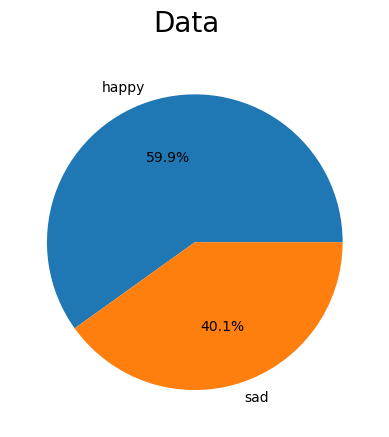

In [6]:
dataCountForPie = [happyCount, sadCount]

#createing the pie plot
fig, ax = plt.subplots()
fig.suptitle('Data', fontsize=20)
ax.pie(dataCountForPie, labels= CATEGORIES, autopct='%1.1f%%')


In [7]:
#keras preprocesses the images and automatically labels them using numbers. Builds the data pipeline

# data = tf.keras.utils.image_dataset_from_directory(DATADIR)
# dataTest = tf.keras.utils.image_dataset_from_directory(DATATEST)
dataAll = tf.keras.utils.image_dataset_from_directory(DATAALL)

Found 12045 files belonging to 2 classes.


In [8]:
os.listdir(DATAALL)

['happy', 'sad']

In [9]:
# this function allows users to access the data pipelines "data_iterator_all"

# data_iterator = data.as_numpy_iterator()
# data_iterator_test = dataTest.as_numpy_iterator()

data_iterator_all = dataAll.as_numpy_iterator()

In [10]:
#allows users to access data pipeline

# batch = data_iterator.next()
# batchTest = data_iterator_test.next()

batchAll = data_iterator_all.next()

In [11]:
# batch[0]
# batchTest[0]

#class 1 = sad, class 0 = happy
batchAll[0]

array([[[[175., 175., 175.],
         [175., 175., 175.],
         [175., 175., 175.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[175., 175., 175.],
         [175., 175., 175.],
         [175., 175., 175.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        [[175., 175., 175.],
         [175., 175., 175.],
         [175., 175., 175.],
         ...,
         [170., 170., 170.],
         [170., 170., 170.],
         [170., 170., 170.]],

        ...,

        [[ 79.,  79.,  79.],
         [ 79.,  79.,  79.],
         [ 79.,  79.,  79.],
         ...,
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.]],

        [[ 79.,  79.,  79.],
         [ 79.,  79.,  79.],
         [ 79.,  79.,  79.],
         ...,
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.],
         [ 94.,  94.,  94.]],

        [[ 79.,  79.,  79.],
       

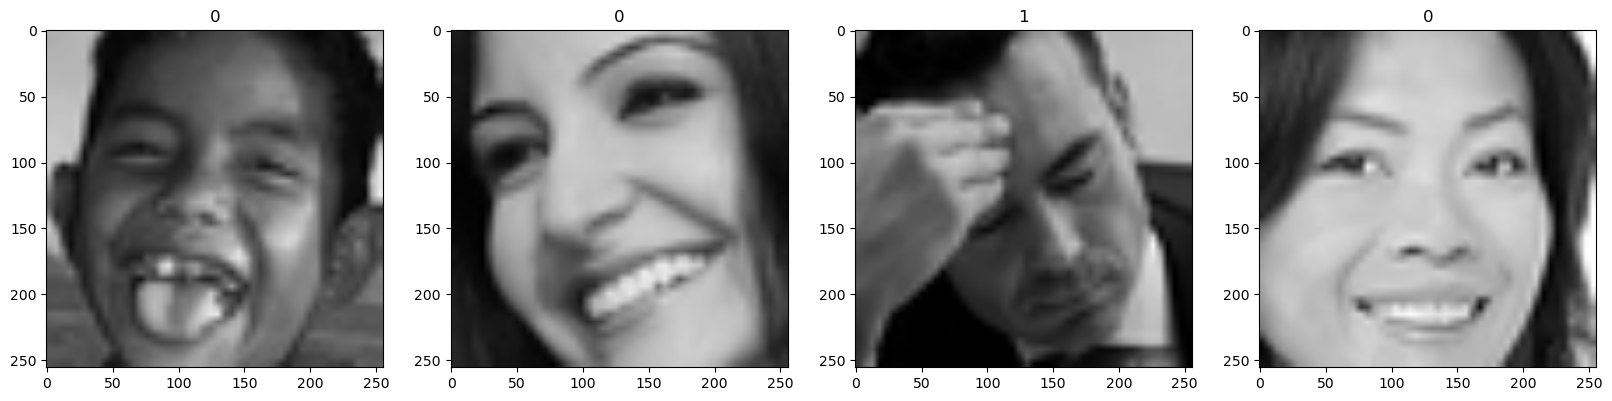

In [12]:
#this will help user determine what each image is classified as, for this, 0 = happy and 1 = sad

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, img in enumerate(batchAll[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batchAll[1][index])

# test
# for index, img in enumerate(batchTest[0][:4]):
#     ax[index].imshow(img.astype(int))
#     ax[index].title.set_text(batchTest[1][index])

In [13]:
#allows map function allows to scale images within the pipeline

#scale data
data = dataAll.map(lambda x, y: (x/255, y))
# dataTest = dataTest.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [14]:
data.as_numpy_iterator().next()[0].max()


1.0

In [15]:
len(data)

377

In [16]:
#splitting the data

trainSize = int(len(data)* 0.7)
valSize = int(len(data)* 0.2) + 1
testSize = int(len(data)*0.1) + 1


In [17]:
trainSize

263

In [18]:
train = data.take(trainSize)
val = data.skip(trainSize).take(valSize)
test = data.skip(trainSize + valSize).take(testSize)

In [19]:
len(train)

263

In [20]:
#build deep learning model
# Sequential go throughs each images and condenses them 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [25]:
logDir = 'logs'

In [26]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
263/263 [==============================] - 237s 897ms/step - loss: 0.6421 - accuracy: 0.6229 - val_loss: 0.5643 - val_accuracy: 0.7072
Epoch 2/20
263/263 [==============================] - 233s 887ms/step - loss: 0.5721 - accuracy: 0.6991 - val_loss: 0.5436 - val_accuracy: 0.7076
Epoch 3/20
263/263 [==============================] - 240s 911ms/step - loss: 0.5202 - accuracy: 0.7336 - val_loss: 0.5280 - val_accuracy: 0.7286
Epoch 4/20
263/263 [==============================] - 273s 1s/step - loss: 0.4761 - accuracy: 0.7653 - val_loss: 0.5327 - val_accuracy: 0.7393
Epoch 5/20
263/263 [==============================] - 272s 1s/step - loss: 0.4196 - accuracy: 0.8056 - val_loss: 0.5060 - val_accuracy: 0.7599
Epoch 6/20
263/263 [==============================] - 239s 907ms/step - loss: 0.3310 - accuracy: 0.8518 - val_loss: 0.5856 - val_accuracy: 0.7377
Epoch 7/20
263/263 [==============================] - 253s 961ms/step - loss: 0.2344 - accuracy: 0.9036 - val_loss: 0.6079 - val_a

In [28]:
hist.history

{'loss': [0.6421306133270264,
  0.5720571279525757,
  0.5201707482337952,
  0.47605863213539124,
  0.4196464419364929,
  0.33098191022872925,
  0.23442380130290985,
  0.14505688846111298,
  0.08647524565458298,
  0.060880668461322784,
  0.04603410139679909,
  0.03657808154821396,
  0.028186863288283348,
  0.028227925300598145,
  0.026903929188847542,
  0.019774125888943672,
  0.011657699942588806,
  0.00977562926709652,
  0.013045691885054111,
  0.022402232512831688],
 'accuracy': [0.6228612065315247,
  0.6991444826126099,
  0.7336026430130005,
  0.7653279304504395,
  0.8056083917617798,
  0.8518298268318176,
  0.9036359190940857,
  0.9432034492492676,
  0.9698193669319153,
  0.9787309765815735,
  0.9827709197998047,
  0.9885931611061096,
  0.9916825294494629,
  0.9915636777877808,
  0.9920389652252197,
  0.9940589070320129,
  0.9967918395996094,
  0.9971482753753662,
  0.9957224130630493,
  0.9923954606056213],
 'val_loss': [0.5643485188484192,
  0.5436164736747742,
  0.52800726890563

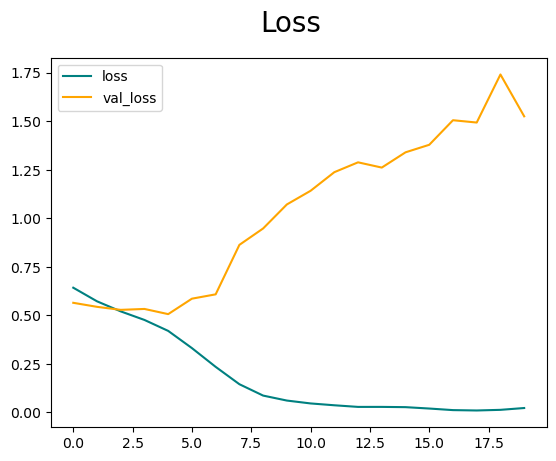

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color="orange", label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

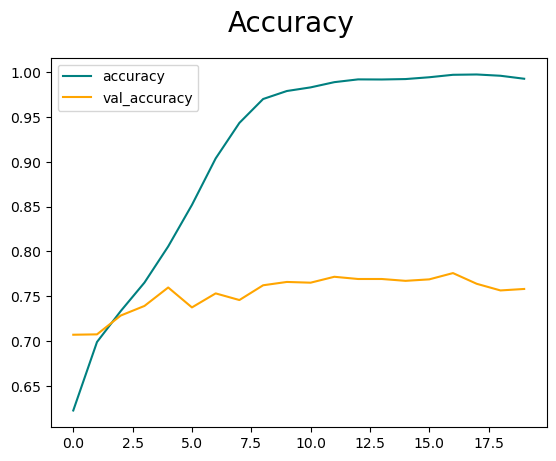

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color="orange", label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [31]:
# section that evaluates the performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 395ms/step


In [34]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.6926714181900024, Recall:0.6301075220108032, Accuracy:0.7477025985717773


In [37]:
#test the model with an unseen image
img = cv2.imread("C:\\Users\\lyosh\\OneDrive\\Desktop\\archive\\happyPersonTest.png")
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2BGRA))
#plt.show()

In [39]:
#resize is the resized image

resize = tf.image.resize(img, (256, 256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [40]:
np.expand_dims(resize, 0)

array([[[[240.3125  , 248.3125  , 255.      ],
         [241.      , 249.      , 255.      ],
         [241.      , 249.      , 255.      ],
         ...,
         [237.      , 245.      , 255.      ],
         [236.      , 244.      , 254.      ],
         [236.3125  , 244.3125  , 254.3125  ]],

        [[241.      , 249.      , 255.      ],
         [241.      , 249.      , 255.      ],
         [241.      , 249.      , 255.      ],
         ...,
         [236.      , 244.      , 254.      ],
         [236.      , 244.      , 254.      ],
         [236.      , 244.      , 254.      ]],

        [[241.37463 , 249.37463 , 255.      ],
         [241.      , 249.      , 255.      ],
         [241.      , 249.      , 255.      ],
         ...,
         [236.      , 244.      , 254.      ],
         [236.45508 , 244.45508 , 254.45508 ],
         [236.      , 244.      , 254.      ]],

        ...,

        [[ 57.728027,  91.789795, 101.789795],
         [ 58.818848,  91.81885 , 101.81885 ]

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [42]:
yhat

array([[0.99999976]], dtype=float32)

In [43]:
if yhat < 0.5:
    print("it is happy")
else:
    print("it is sad")

it is sad


In [44]:
#saving the model

from tensorflow.keras.models import load_model


In [45]:
# making a file called 'models' that will store the serialization of the model
model.save(os.path.join('models', 'happySadModel.h5'))

In [46]:
# loading the model into variable 'new_model' to use
new_model = load_model(os.path.join('models', 'happySadModel.h5'))

In [47]:
new_model

In [48]:
#using the new_model to predict the classification of the image

new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


array([[0.99999976]], dtype=float32)